## K-means Clustering

In this part,you will implement the K-means algorithm and use it for image compression.

using ex7data1.mat

### 1.1 Implementing K-means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

def plotData(dataSet):
    
    plt.figure(figsize=(12,8))
    plt.scatter(dataSet['X1'],dataSet['X2'],c='yellow',edgecolors='black')
    plt.legend(['data'])

In [3]:
data2=loadmat('ex7data2.mat')
data2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.243

In [4]:
dataSet2=pd.DataFrame(data2.get('X'),columns=['X1','X2'])

dataSet2.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


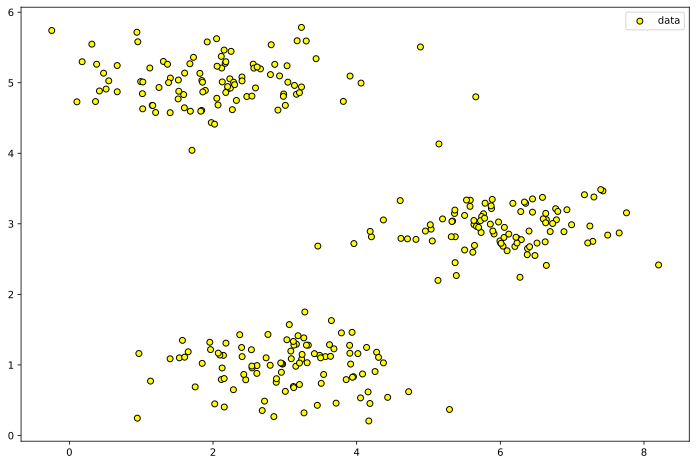

In [5]:
plotData(dataSet2)

#### 1.1.1 Finding closest centroids

The $cluster\space assignment\space algorithm$ assigns every training examples $x^{(i)}$ to its closest centroids,given the current positions of centroids.Specifically,for every example i we set:

$c^{(i)}:=j\space that\space minimizes ||x^{(i)}-u_{j}||^{2}$

In [6]:
def find_closest_centroids(X,centroids):
    m=X.shape[0]
    k=centroids.shape[0]
    idx=np.zeros(m)
    
    for i in range(m):
        min_dist=10000000
        for j in range(k):
            dist=np.sum((X[i,:]-centroids[j,:])**2)
            if(dist<min_dist):
                min_dist=dist
                idx[i]=j
                
    return idx

In [7]:
data=data2
X=data2['X']
initial_centroids=np.array([[3,3],[6,2],[8,5]])

idx=find_closest_centroids(X,initial_centroids)
idx[0:3]

array([0., 2., 1.])

#### 1.1.2 Computing centroid means

Specifically,for every centroid k we set:

$u_{k}:=\frac{1}{|C_{k}|}\sum{x^{(i)}}\space{i\in{C_{k}}}$

In [8]:
def compute_centroid_means(X,idx,k):
    m,n=X.shape
    centroids=np.zeros((k,n))
    
    for i in range(k):
        indices=np.where(idx==i)
        centroids[i,:]=(np.sum(X[indices,:],axis=1)/len(indices[0])).ravel()
        
    return centroids

In [9]:
compute_centroid_means(X,idx,3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

### 1.2 K-means on example dataset

In [10]:
def run_k_means(X,initial_centroids,max_iters):
    m,n=X.shape
    k=initial_centroids.shape[0]
    idx=np.zeros(m)
    centroids=initial_centroids
    
    for i in range(max_iters):
        idx=find_closest_centroids(X,centroids)
        centroids=compute_centroid_means(X,idx,k)
        
    return idx,centroids

In [11]:
idx,centroids=run_k_means(X,initial_centroids,10)

In [12]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
def plotCluster(X,idx):
    cluster1=X[np.where(idx==0)[0],:]
    cluster2=X[np.where(idx==1)[0],:]    
    cluster3=X[np.where(idx==2)[0],:]   
    
    plt.figure(figsize=(12,8))
    plt.scatter(cluster1[:,0],cluster1[:,1],c='',edgecolors='r')
    plt.scatter(cluster2[:,0],cluster2[:,1],c='',edgecolors='g')    
    plt.scatter(cluster3[:,0],cluster3[:,1],c='',edgecolors='b')    
    plt.legend(['Cluster1','Cluster2','Cluster3'])

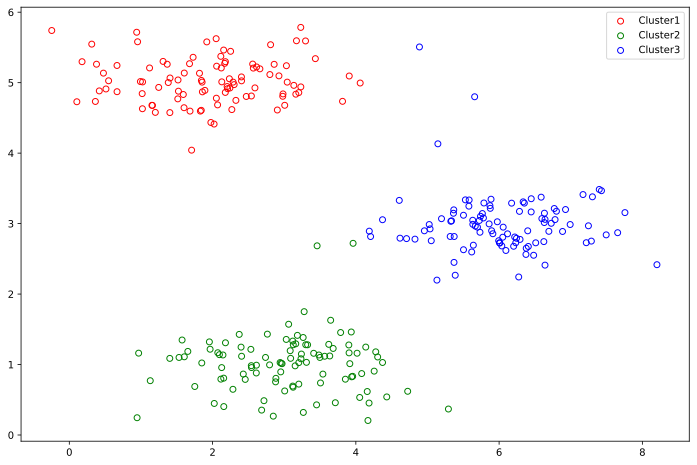

In [13]:
plotCluster(X,idx)

### 1.3 Random initialization

A good strategy for initializing the centroids is to select random examples from the training set

In [14]:
def init_centroids(X,k):
    m,n=X.shape
    centroids=np.zeros((k,n))
    idx=np.random.randint(0,m,k)   #np.random.randint(low,high,size)
    for i in range(k):
        centroids[i,:]=X[idx[i],:]
        
    return centroids

In [15]:
init_centroids(X,3)

array([[5.132009  , 2.19812195],
       [6.92721968, 3.19960026],
       [2.11496411, 5.37373587]])

### 1.4 Image compression with K-means

In this part,you will apply K-means algorithm to image compression.

Concretely,you will treat every pixel in the original image as as data example and use K-means algorithm to find the 16 colors that best group(cluster) the pixels in the 3-dimensional RGB space.

![jupyter](./bird_small.png)

#### 1.4.1 K-means on pixels

In [16]:
image_data=loadmat('bird_small.mat')

image_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  5 04:06:24 2012',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
     

In [17]:
A=image_data['A']

A.shape

(128, 128, 3)

In [18]:
#normalize value ranges
A=A/255

#reshape the array
X=np.reshape(A,(A.shape[0]*A.shape[1],A.shape[2]))

X.shape

(16384, 3)

In [19]:
#randomly initialize the centroids
initial_centroids=init_centroids(X,16)

#run the K-means algorithm
idx,centroids=run_k_means(X,initial_centroids,10)

#get the closest centroids one last time
idx=find_closest_centroids(X,centroids)

#map each pixel to the centroid value
X_recovered=centroids[idx.astype(int),:]
X_recovered.shape

(16384, 3)

In [20]:
#reshape it to the original dimensions
X_recovered=np.reshape(X_recovered,(A.shape[0],A.shape[1],A.shape[2]))
X_recovered.shape

(128, 128, 3)

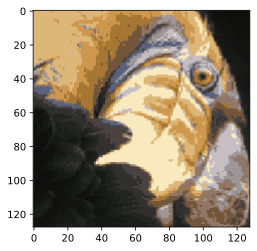

In [21]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

plt.imshow(X_recovered)
plt.show()

#### 1.4.2 Use sklearn

In [22]:
from skimage import io

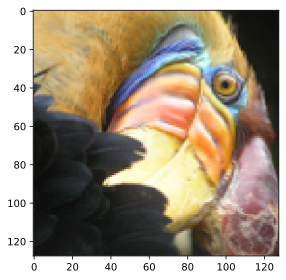

In [23]:
pic=io.imread('bird_small.png')/255.
io.imshow(pic)
plt.show()

In [24]:
pic.shape

(128, 128, 3)

In [25]:
data=pic.reshape(128*128,3)
data.shape

(16384, 3)

In [26]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=16,n_init=100,n_jobs=-1)

In [27]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=100, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
centroids=model.cluster_centers_
print(centroids.shape)

C=model.predict(data)
print(C.shape)

(16, 3)
(16384,)


In [29]:
centroids[C].shape

(16384, 3)

In [30]:
compressed_pic=centroids[C].reshape((128,128,3))

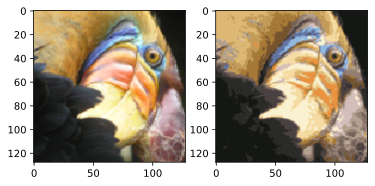

In [31]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)
plt.show()